In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## DAILY APPROACH

In [3]:
df_day = pd.read_csv('/content/day_approach_maskedID_timeseries.csv')

In [4]:
df_day.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [5]:
df_day.shape

(42766, 73)

We have a total of 42766 records and 73 columns. Description of each column is given below.

Data in daily dataset contains information about athletes for every 7 days, and there are 10 unique features that define each session of an athlete.

So, there are a total of 70 columns for each week, which shows that before an injury happened/not happened, the data was collected for last 7 days which is represented as columns in our dataset repeated 7 times, thus giving us a total of 7*10 = 70 columns.

These 70 columns are our features, while the rest of the 3 columns denote Athlete ID (unique ID for each athlete), Injury (whether there was an injury to that athlete or not), and Day.

Also, the day 0 is one day before the injury, day 1 is 2 days before, and day 6 is 7 days before the injury.

Number of sessions [0, 2] - Total number of sessions in that day.
RUNNING TRAINING FOR DIFFERENT HEART ZONES AND TRACK TYPES:

Total distance [0.0, 25.0] - Total distance covered by the athlete.
Sum of distance in Z3–Z4 [0.0, 15.0] - Total distance covered in heart rate zone Z3-Z4.
Sum of distance in Z5, T1, and T2 [0.0, 10.0] - Distance covered in heart rate zone Z5, for both T1 and T2 (long and short track intervals).
Distance sprinting [0.0, 1.5] - Distance ceovered during sprinting by the athlete.
Number of strength sessions [0, 1] - The number of strength session which the athlete had.
ALTERNATIVE TRAINING (CROSS-TRAINING) SUCH AS CYCLING/SWIMMING DURATION.

Hours alternative training [0.0, 3.0] - The number of hours spent by athlete in alternative trainings.

Perceived exertion [0.0, 1.0] - How exhausted the athlete felt upon completion of the training?

Perceived training success [0.0, 1.0] - How well the athlete thought the training went?
Perceived recovery [0.0, 1.0] - How well the athlete was feeling before the start of the session?

In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

All the variables seem to be either in float or int format. This looks goods and no change is required.

In [8]:
df_day.isnull().sum().any()

False

There doesn't seem to be any null values in any of our records.

0    42183
1      583
Name: injury, dtype: int64


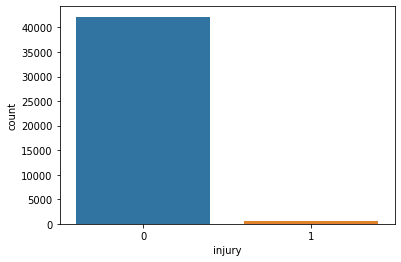

In [30]:
print(df_day['injury'].value_counts())
sns.countplot(df_day['injury'])

In our entire dataset, there are a total of 42183 times when an athlete didn't got injured, and 583 times when an athlete got injured.

In [9]:
print(df_day['nr. sessions'].sum())
print(df_day['nr. sessions.1'].sum())
print(df_day['nr. sessions.2'].sum())
print(df_day['nr. sessions.3'].sum())
print(df_day['nr. sessions.4'].sum())
print(df_day['nr. sessions.5'].sum())
print(df_day['nr. sessions.6'].sum())

35477.0
35453.0
35477.0
35465.0
35490.0
35443.0
35445.0


We can see that on an average, the sum of total number of session for all the athletes collectively for all weeks is same.

In [10]:
df_ath_ses = pd.DataFrame()
df_ath_ses['Day0'] = df_day.groupby('Athlete ID')['nr. sessions'].sum()
df_ath_ses['Day1'] = df_day.groupby('Athlete ID')['nr. sessions.1'].sum()
df_ath_ses['Day2'] = df_day.groupby('Athlete ID')['nr. sessions.2'].sum()
df_ath_ses['Day3'] = df_day.groupby('Athlete ID')['nr. sessions.3'].sum()
df_ath_ses['Day4'] = df_day.groupby('Athlete ID')['nr. sessions.4'].sum()
df_ath_ses['Day5'] = df_day.groupby('Athlete ID')['nr. sessions.5'].sum()
df_ath_ses['Day6'] = df_day.groupby('Athlete ID')['nr. sessions.6'].sum()

In [11]:
df_ath_ses.reset_index(inplace=True)

In [12]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2,Day3,Day4,Day5,Day6
0,0,181.0,181.0,182.0,180.0,181.0,180.0,179.0
1,1,399.0,398.0,397.0,396.0,396.0,394.0,394.0
2,2,1024.0,1028.0,1025.0,1025.0,1026.0,1023.0,1024.0
3,3,282.0,282.0,281.0,280.0,279.0,277.0,275.0
4,4,621.0,623.0,624.0,627.0,627.0,627.0,623.0


The above dataframe shows total number of sessions each Athlete had for all the weeks of their training.

In [15]:
df_ath_ses['sum'] = df_ath_ses.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].sum(axis=1)

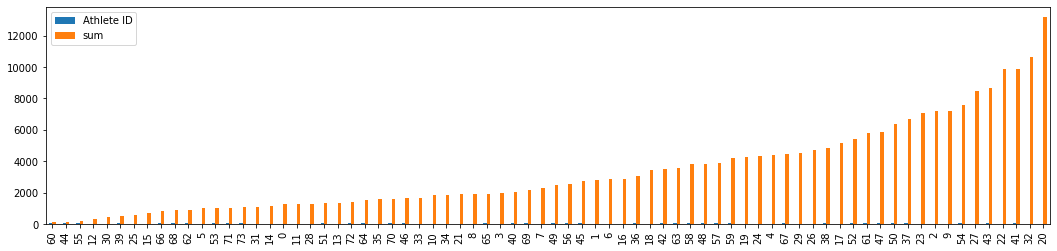

In [16]:
df_ath_ses[['Athlete ID','sum']].sort_values('sum').plot(kind='bar', figsize=(18,4))

From the plot above, we can clearly see that Athleted ID 60 did least number of sessions over all weeks whereas Athlete ID 20 did maximum number of sessions.

In [17]:
df_ath_ses.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].mean(axis=1).mean()

479.2471042471043

On an average, each Athlete did 480 sessions/week.

In [18]:
df_date_km = pd.DataFrame()
df_date_km['Day0'] = df_day.groupby('Athlete ID')['total km'].sum()
df_date_km['Day1'] = df_day.groupby('Athlete ID')['total km.1'].sum()
df_date_km['Day2'] = df_day.groupby('Athlete ID')['total km.2'].sum()
df_date_km['Day3'] = df_day.groupby('Athlete ID')['total km.3'].sum()
df_date_km['Day4'] = df_day.groupby('Athlete ID')['total km.4'].sum()
df_date_km['Day5'] = df_day.groupby('Athlete ID')['total km.5'].sum()
df_date_km['Day6'] = df_day.groupby('Athlete ID')['total km.6'].sum()

In [19]:
df_date_km.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6
Athlete ID,,,,,,,
0,987.0,992.6,996.7,987.7,994.6,1016.6,974.0
1,7315.2,7279.5,7271.2,7233.2,7236.9,7197.9,7212.2
2,13198.1,13221.6,13221.8,13172.2,13209.2,13164.4,13143.4
3,2326.6,2325.5,2288.3,2287.5,2268.5,2239.7,2220.6
4,5951.3,5982.0,5978.6,5981.9,5999.0,5997.6,5981.5


In [20]:
df_date_km['sum'] = df_date_km.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].sum(axis=1)

In [21]:
df_date_km.reset_index(inplace=True)

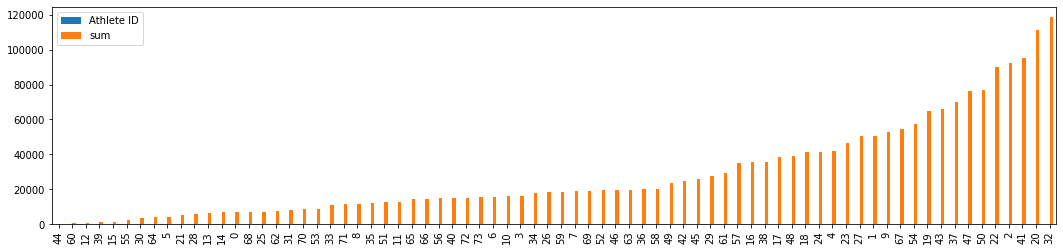

In [22]:
df_date_km[['Athlete ID','sum']].sort_values('sum').plot(kind='bar', figsize=(18,4))

Athlete ID 44 ran the least number of kilometres whereas Athlete ID 32 ran the highest number of kilometres.

In [23]:
df_date_ses = pd.DataFrame()

df_date_ses['Day0'] = df_day.groupby('Date')['nr. sessions'].sum()
df_date_ses['Day1'] = df_day.groupby('Date')['nr. sessions.1'].sum()
df_date_ses['Day2'] = df_day.groupby('Date')['nr. sessions.2'].sum()
df_date_ses['Day3'] = df_day.groupby('Date')['nr. sessions.3'].sum()
df_date_ses['Day4'] = df_day.groupby('Date')['nr. sessions.4'].sum()
df_date_ses['Day5'] = df_day.groupby('Date')['nr. sessions.5'].sum()
df_date_ses['Day6'] = df_day.groupby('Date')['nr. sessions.6'].sum()

In [25]:
df_date_ses.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6
Date,,,,,,,
0,27.0,34.0,38.0,31.0,28.0,30.0,23.0
1,34.0,38.0,31.0,28.0,30.0,23.0,27.0
2,38.0,31.0,28.0,30.0,23.0,27.0,31.0
3,31.0,28.0,30.0,23.0,27.0,31.0,36.0
4,28.0,30.0,24.0,27.0,32.0,37.0,33.0


The above dataframe shows us the total number of sessions for each week for all the athletes.

In [26]:
df_date_ses['sum'] = df_date_ses.loc[0:,['Day0','Day1','Day2','Day3','Day4','Day5','Day6']].sum(axis=1)

In [27]:
df_date_ses.reset_index(inplace=True)

In [28]:
df_date_ses.sort_values('sum')

,Date,Day0,Day1,Day2,Day3,Day4,Day5,Day6,sum
600,640,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
2613,2673,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0
595,598,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0
598,606,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0
2612,2665,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
93,93,37.0,28.0,13.0,49.0,52.0,44.0,47.0,270.0
97,97,52.0,44.0,47.0,45.0,46.0,7.0,35.0,276.0
94,94,28.0,13.0,49.0,52.0,44.0,47.0,45.0,278.0
96,96,49.0,52.0,44.0,47.0,45.0,46.0,7.0,290.0


From the above table, we can clearly see that Week 600 had the lowest number of sessions (3) whereas Week 95 had the highest number of sessions (296) for all the athletes.

## WEEKLY APPROACH

In [ ]:
df_week = pd.read_csv('/content/week_approach_maskedID_timeseries.csv')
df_week.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


In [ ]:
df_week.isnull().values.any()

False

In [ ]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

0    42223
1      575
Name: injury, dtype: int64


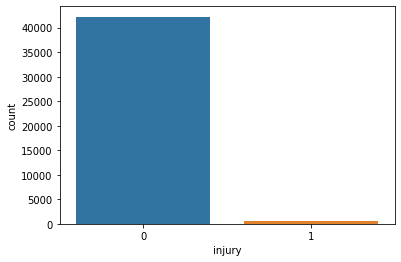

In [ ]:
print(df_week['injury'].value_counts())
sns.countplot(df_week['injury'])

In our entire dataset, there are a total of 42223 times an athlete didn't got injured, and 575 times an athlete got injured.

## Analysis on nr.session

In [ ]:
print(df_week['nr. sessions'].sum())
print(df_week['nr. sessions.1'].sum())
print(df_week['nr. sessions.2'].sum())

248628.0
248580.0
248690.0


In [ ]:
df_ath_ses = pd.DataFrame()
df_ath_ses['Day0'] = df_week.groupby('Athlete ID')['nr. sessions'].sum()
df_ath_ses['Day1'] = df_week.groupby('Athlete ID')['nr. sessions.1'].sum()
df_ath_ses['Day2'] = df_week.groupby('Athlete ID')['nr. sessions.2'].sum()

In [ ]:
df_ath_ses.head()

,Day0,Day1,Day2
Athlete ID,,,
0,1264.0,1278.0,1257.0
1,2774.0,2771.0,2704.0
2,7175.0,7175.0,7133.0
3,1956.0,1987.0,2015.0
4,4372.0,4318.0,4281.0


In [ ]:
df_ath_ses.reset_index(inplace=True)

In [ ]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2
0,0,1264.0,1278.0,1257.0
1,1,2774.0,2771.0,2704.0
2,2,7175.0,7175.0,7133.0
3,3,1956.0,1987.0,2015.0
4,4,4372.0,4318.0,4281.0


In [ ]:
df_ath_ses['Total'] = df_ath_ses.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [ ]:
df_ath_ses.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,1264.0,1278.0,1257.0,3799.0
1,1,2774.0,2771.0,2704.0,8249.0
2,2,7175.0,7175.0,7133.0,21483.0
3,3,1956.0,1987.0,2015.0,5958.0
4,4,4372.0,4318.0,4281.0,12971.0


The dataframe above shows total number of sessions each Athlete had for their training.

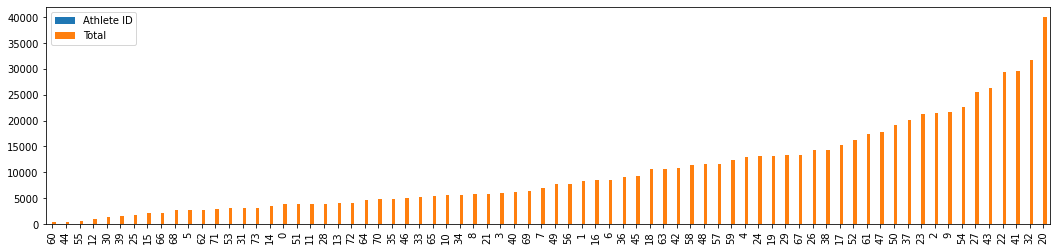

In [ ]:
df_ath_ses[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))

From the plot above, we can clearly see that Athleted ID 60 did least number of sessions  whereas Athlete ID 20 did maximum number of sessions.

## Analysis on nr. rest days 

In [ ]:
df_ath_rest = pd.DataFrame()
df_ath_rest['Day0'] = df_week.groupby('Athlete ID')['nr. rest days'].sum()
df_ath_rest['Day1'] = df_week.groupby('Athlete ID')['nr. rest days.1'].sum()
df_ath_rest['Day2'] = df_week.groupby('Athlete ID')['nr. rest days.2'].sum()

In [ ]:
df_ath_rest.head()

,Day0,Day1,Day2
Athlete ID,,,
0,958.0,938.0,955.0
1,1072.0,1093.0,1145.0
2,2280.0,2281.0,2324.0
3,600.0,580.0,561.0
4,1055.0,1091.0,1125.0


In [ ]:
df_ath_rest.reset_index(inplace=True)

In [ ]:
df_ath_rest.head()

,Athlete ID,Day0,Day1,Day2
0,0,958.0,938.0,955.0
1,1,1072.0,1093.0,1145.0
2,2,2280.0,2281.0,2324.0
3,3,600.0,580.0,561.0
4,4,1055.0,1091.0,1125.0


In [ ]:
df_ath_rest['Total'] = df_ath_rest.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [ ]:
df_ath_rest.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,958.0,938.0,955.0,2851.0
1,1,1072.0,1093.0,1145.0,3310.0
2,2,2280.0,2281.0,2324.0,6885.0
3,3,600.0,580.0,561.0,1741.0
4,4,1055.0,1091.0,1125.0,3271.0


The dataframe above shows the total number of rest days each Athlete had for their training.

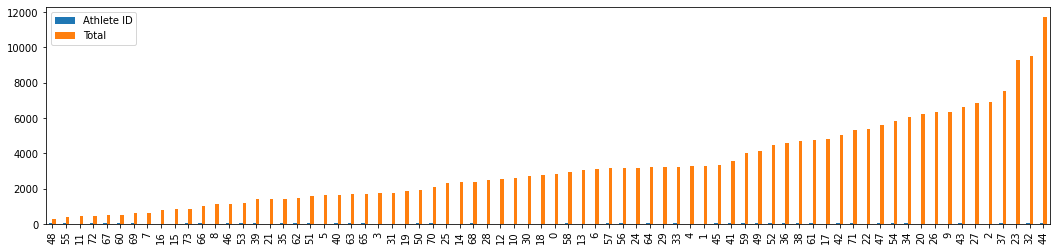

In [ ]:
df_ath_rest[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))

Athlete 44 had the most number of Rest Days whereas Athlete 48 had the least.

## Analysis on  nr. tough sessions (effort in Z5, T1 or T2)   

In [ ]:
df_ath_tses = pd.DataFrame()
df_ath_tses['Day0'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2)'].sum()
df_ath_tses['Day1'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2).1'].sum()
df_ath_tses['Day2'] = df_week.groupby('Athlete ID')['nr. tough sessions (effort in Z5, T1 or T2).2'].sum()

In [ ]:
df_ath_tses.head()

,Day0,Day1,Day2
Athlete ID,,,
0,154.0,161.0,157.0
1,299.0,297.0,285.0
2,815.0,825.0,841.0
3,720.0,716.0,727.0
4,725.0,704.0,694.0


In [ ]:
df_ath_tses.reset_index(inplace=True)

In [ ]:
df_ath_tses.head()

,Athlete ID,Day0,Day1,Day2
0,0,154.0,161.0,157.0
1,1,299.0,297.0,285.0
2,2,815.0,825.0,841.0
3,3,720.0,716.0,727.0
4,4,725.0,704.0,694.0


In [ ]:
df_ath_tses['Total'] = df_ath_tses.loc[0:,['Day0','Day1','Day2']].sum(axis=1)

In [ ]:
df_ath_tses.head()

,Athlete ID,Day0,Day1,Day2,Total
0,0,154.0,161.0,157.0,472.0
1,1,299.0,297.0,285.0,881.0
2,2,815.0,825.0,841.0,2481.0
3,3,720.0,716.0,727.0,2163.0
4,4,725.0,704.0,694.0,2123.0


The dataframe above shows the total number of tough sessions each Athlete had for their training.

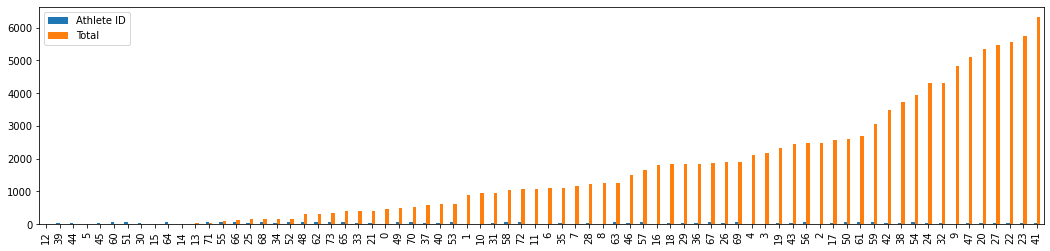

In [ ]:
df_ath_tses[['Athlete ID','Total']].sort_values('Total').plot(kind='bar', figsize=(18,4))

Athlete 41 had the most number of tough sessions whereas Athlete 12 had the least.

## Analysis on injury per athlete

In [ ]:
df_ath_injury = pd.DataFrame()
df_ath_injury['Number of injury per Athlete'] = df_week.groupby('Athlete ID')['injury'].sum()

In [ ]:
df_ath_injury.head()

,Number of injury per Athlete
Athlete ID,
0,7
1,2
2,4
3,3
4,7


In [ ]:
df_ath_injury.describe()

,Number of injury per Athlete
count,74.000000
mean,7.770270
std,8.281928
min,0.000000
25%,2.000000
50%,5.000000
75%,11.500000
max,35.000000


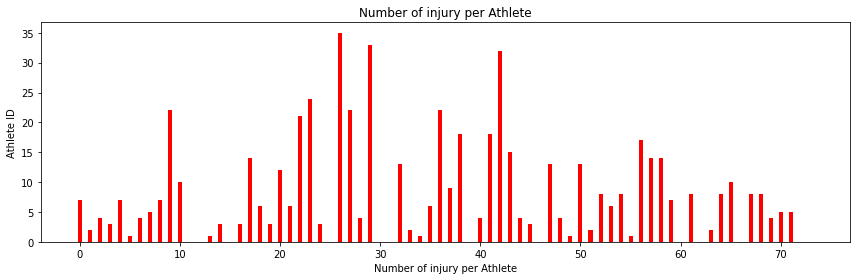

In [ ]:
plt.figure(figsize=(12,4))
ax = plt.subplot()
ax.bar(df_ath_injury.index, height = df_ath_injury['Number of injury per Athlete'], color = 'red', width = 0.4)
plt.title('Number of injury per Athlete')
plt.ylabel('Athlete ID')
plt.xlabel('Number of injury per Athlete')
plt.tight_layout()
plt.show()